#Business Understanding
The dataset is a collection of URLs followed by various attributes of the website and of the url itself. Each URL is assigned a Label that indicates whether the link is a phishing or legitimate site. The dataset was gathered to study and detect phishing websites. Phishing is one of the most prominent hacking methods used commonly. The method has been proven to evade human intuition and work on even the most vigilant victims. Phishing victims are subject to financial loss and reputational damages depending on the motive of the bad actors. This creates plenty of motivation for organizations to effectively detect and block potential phishing URLs before users even have an opportunity to click on them. In our particular dataset, we use the "label" attribute to determine if a URL is a legitimate or phishing link. (1 = Legitimate and 0 = Phish Link) If phishing and legitimate URLSs show different patterns, then the dataset provides useful knowledge for our prediction model. Attributes such as HasCopyrightInfo and HasSocialNet indicate some correlation with classifying as a legitimate link, inversely SpecialCharRatioinURL has correlation with phishing links. These attribute displaying correlation towards a specific label gives us confidence that the data collected is "useful". A prediction model for capturing phishing links should prioritize detecting as many phishing URLs as possible, even at the expense of more flagging legitimate links. In practice, it is imperative to detect phishing links because these are the methods that could potentially be exploited and flagging legitimate links have much smaller consequences. 

##Data Understanding
###Attribute Meaning and Data Type

#Identification and Text
FILENAME
- ID of the origianl Text file or record for the URL

URL
- Full Website Address

Domain
- Main domain part of the URL

TLD
- Top-Level Domain

Title
- Page Title

#Lengths
URLLength
- Number of char in the full URL

DomainLength
- Number of char in domain

TLDLength
- Number of char in the TLD
  
NoOfSubDomain
- Count of subdomain in the URL

NoOfObfuscatedChar
- Count of obfuscated char

NoOfLettersInURL
- Count of letters in the URL (a-z,A-Z)

NoOfDegitsInRUL
- Digit Count in URL
- 
NoOfEqualsInURL/NoOfQMarkInURL/NoOfAmpersandInURL/NoOfOtherSpecialCharsInURL
- Counts of types of special char in the URL

LineOfCode
- Totalnumber of lines of HTML code on the page

LargestLineLength
- Length of longest line of HTML

NoOfURLRedirct/NoOfSelfRedirect
-Number of URL redirects and redirects to the same domain

NoOfPopup/NoOfiFrame
- Number of popups and iFrames

NoOfImage/NoOfCSS/NoOfJS
- Count of images, CSS files, and JS Files
- 

NoOfSelfRef/NoOfEmptyRef/NoOfExternalRef
- Number of links on page (internal,empty,external)


#Ratios,Probabilities, and Similarity Scores ("Oh My")
URLSimilarityIndex
- Similarity Score between URL and Index Reference

CharContinuationRate
- Rate at which char repeat patterns (Randomness)
  
TLDLegitimateProb
- Probability that TLD is associated with legitimate sites

URLCharProb
- Probability score based on char distribution in URL
  
ObfuscationRatio
- Proportion of obfuscated char relative to length of URL
  
LetterRatioInURL/DegitRatioInURL
-Char and Num ratio relative to URL Length

SpacialCharRatioInURL
- Ratio of special char in URL

DomainTitleMatchScore/URLTitleMatchScore
- Similarity scores between domain or URL Text and the page title

#Binary Flag
IsDomainIP
- 1 = If the domain is an IP addr
  
HasObfuscation
- 1= URL has obfuscation patterns

IsHTTPS  
- 1 = The url uses HTTPS

HasTitle  
- 1 = The page has a non-empty HTML Title

HasFavicon  
- 1 = Site has a favicon

Robots
- 1 = a robot.txt file is present

IsResponsive
- 1 = The site is responsivle (Adaptive)

HasDescription
- 1 = Page has a meta description

HasExternalFormSubmit
- 1= If a form submits to an external domain


HasSocialNet
- 1 = Social Media links are present

HasSubmitButton/HasHiddenFields/HasPasswordField  
- 1 = Presence of submit buttons, hidden forms and password fields
  
Bank/Pay/Crypto  
- 1 = Page is related to financial topics

HasCopyrightInf
- 1 = Copyright info is present

#Target
label 
- 1 = Legitimate Website

In [9]:
#Importing Dataset and quick head view and dimension check (235795, 56)
import pandas as pd
from IPython.display import display

df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

display(df.head())
display(df.shape)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


(235795, 56)

In [32]:
#Viewing all Features/Attributes
df.info()
df.describe()
df['label'].value_counts()
df['label'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

label
1    0.571895
0    0.428105
Name: proportion, dtype: float64

In [30]:
#Summary Stats on Features
print("NoOfSubDomain")
print(df['NoOfSubDomain'].value_counts(), "\n")

print("HasObfuscation")
print(df['HasObfuscation'].value_counts(), "\n")

print("ObfuscationRatio")
print(df['ObfuscationRatio'].value_counts(), "\n")

print("IsHTTPS")
print(df['IsHTTPS'].value_counts(), "\n")

print("HasExternalFormSubmit")
print(df['HasExternalFormSubmit'].value_counts(), "\n")

print("HasPasswordField")
print(df['HasPasswordField'].value_counts(), "\n")

print("NoOfPopup")
print(df['NoOfPopup'].value_counts(), "\n")

print("NoOfiFrame")
print(df['NoOfiFrame'].value_counts(), "\n")

print("NoOfExternalRef")
print(df['NoOfExternalRef'].value_counts(), "\n")

NoOfSubDomain
NoOfSubDomain
1     178406
2      36353
0      13983
3       5119
4       1563
5        336
6         21
10         5
7          5
8          4
Name: count, dtype: int64 

HasObfuscation
HasObfuscation
0    235310
1       485
Name: count, dtype: int64 

ObfuscationRatio
ObfuscationRatio
0.000    235310
0.056        57
0.098        11
0.029        10
0.055         9
          ...  
0.099         1
0.132         1
0.165         1
0.093         1
0.202         1
Name: count, Length: 146, dtype: int64 

IsHTTPS
IsHTTPS
1    184539
0     51256
Name: count, dtype: int64 

HasExternalFormSubmit
HasExternalFormSubmit
0    225423
1     10372
Name: count, dtype: int64 

HasPasswordField
HasPasswordField
0    211682
1     24113
Name: count, dtype: int64 

NoOfPopup
NoOfPopup
0      222384
1        7968
2        2041
3         873
4         553
        ...  
105         1
106         1
112         1
65          1
64          1
Name: count, Length: 115, dtype: int64 

NoOfiFrame
NoOfi

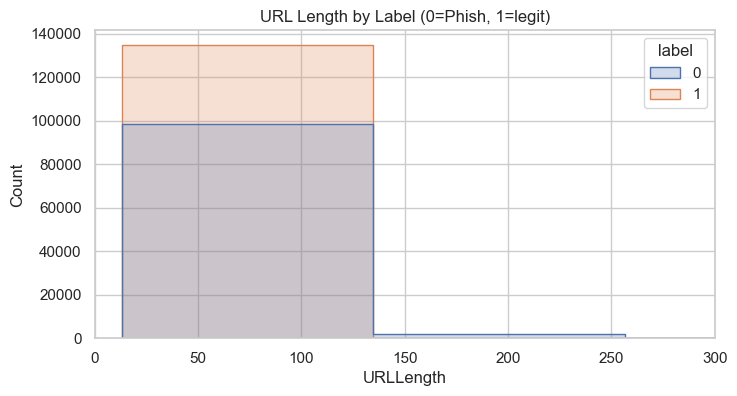

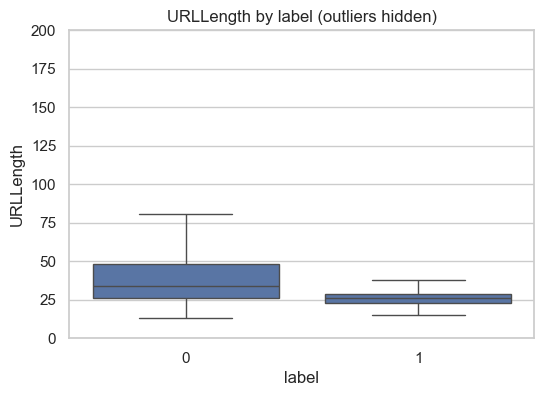

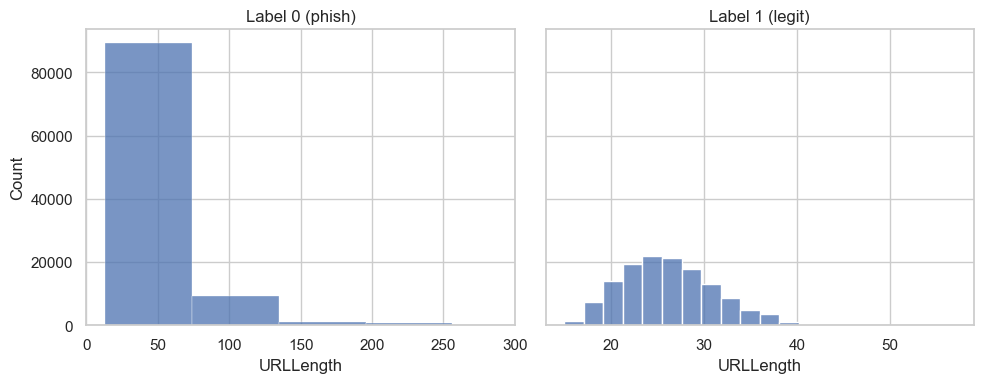

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='URLLength', hue='label', bins=50, kde=False, element='step')
plt.title('URL Length by Label (0=Phish, 1=legit)')
plt.xlim(0, 300)
plt.show()

df.groupby('label')['URLLength'].agg(['count','min','max','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)
plt.ylim(0, 200)   # adjust upper limit until the box is readable
plt.title('URLLength by label (outliers hidden)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# phishing
sns.histplot(df[df['label']==0]['URLLength'], bins=100, ax=axes[0])
axes[0].set_title('Label 0 (phish)')
axes[0].set_xlim(0, 300)   # zoom so bars are visible

# legit
legit = df[df['label']==1]['URLLength']
sns.histplot(legit, bins=20, ax=axes[1])
axes[1].set_title('Label 1 (legit)')
axes[1].set_xlim(legit.min()-2, legit.max()+2)

plt.tight_layout()
plt.show()

In [33]:
#correlation between
corr_with_label = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(corr_with_label.head(20))
print(corr_with_label.tail(20))

label                    1.000000
URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
HasHiddenFields          0.507731
HasFavicon               0.493711
URLCharProb              0.469749
CharContinuationRate     0.467735
HasTitle                 0.459725
Robots                   0.392620
NoOfJS                   0.373500
Pay                      0.359747
NoOfSelfRef              0.316211
NoOfImage                0.274658
Name: label, dtype: float64
NoOfSubDomain                -0.005955
NoOfObfuscatedChar           -0.015315
NoOfAmpersandInURL           -0.034622
LargestLineLength            -0.041111
ObfuscationRatio             -0.041915
NoOfURLRedirect              -0.046456
HasObfuscation               -0.052473
IsDomainIP         